# Introduction to Regression with Neural Networks in TenorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import random

In [3]:
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))

## Steps in modelling with TensorFlow
1. create a model - input, output, hidden layers
2. compiling a model - loss function, optimizer, evaluation metrics
3. fitting the model

In [4]:
# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = "SGD", 
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 9.1572 - mae: 9.1572
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 8.6272 - mae: 8.6272


### Prediction

In [5]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


array([[24.118654]], dtype=float32)

## Improving the Model

In [50]:
# Split Data
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
# Turn tensors into NumPy
# Convert the TensorFlow tensors to NumPy arrays
X_np = X.numpy()
y_np = y.numpy()
# Split the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert the splits back into TensorFlow tensors
X_train = tf.convert_to_tensor(X_train_np)
X_test = tf.convert_to_tensor(X_test_np)
y_train = tf.convert_to_tensor(y_train_np)
y_test = tf.convert_to_tensor(y_test_np)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=['mae'])


model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 53.3068 - mae: 53.3068
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 51.6076 - mae: 51.6076
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 50.5376 - mae: 50.5376
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 49.1789 - mae: 49.1789
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 47.1478 - mae: 47.1478
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 44.1523 - mae: 44.1523
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 39.6849 - mae: 39.6849
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 32.7431 - mae: 32.7431
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 23.6269 - mae: 23.6269
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0176 - mae: 10.0176
Epoch 11/100
2/2 [==============================] - 0s 1ms/

In [52]:
predictions = model.predict([X_test])

1/1 [==============================] - 0s 32ms/step


### Evaluate the model

#### Visualise
- Data
- The Model
- The training of a model
- The predictions

In [53]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# More Data
X = tf.range(-100, 100, 4)
y = X + 10

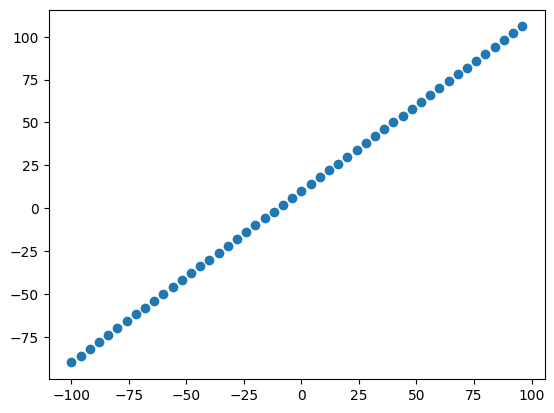

In [54]:
# Visualize the data
plt.scatter(X, y);

In [55]:
# The 3 sets...
len(X)

50

In [56]:
# Split the data into train and test
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

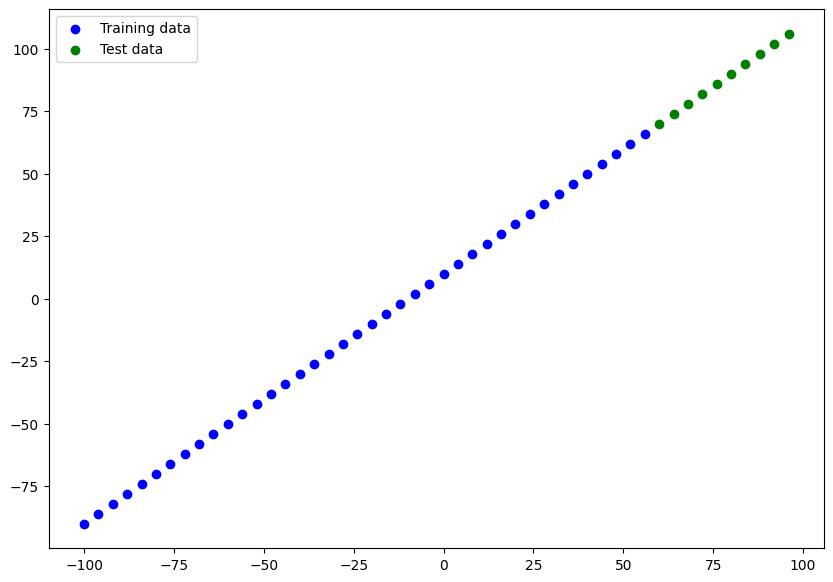

In [57]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend();

##### Visualising the model

In [59]:
# Let's create a model that builds automatically
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='input_layer1', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer2', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer3', activation='relu'),
    tf.keras.layers.Dense(1, name='output_layer')
], name= 'model_1')

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
              metrics=['mae'])

In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 100)               200       
                                                                 
 input_layer2 (Dense)        (None, 100)               10100     
                                                                 
 input_layer3 (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


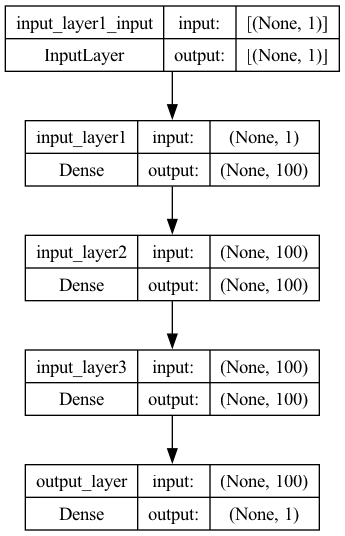

In [61]:
plot_model(model=model, show_shapes=True)

##### Fitting

In [62]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 39.7060 - mae: 39.7060
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 35.6720 - mae: 35.6720
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 32.0576 - mae: 32.0576
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 28.5358 - mae: 28.5358
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 25.2330 - mae: 25.2330
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 21.7608 - mae: 21.7608
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 18.2830 - mae: 18.2830
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 14.5061 - mae: 14.5061
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 12.2511 - mae: 12.2511
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 13.3410 - mae: 13.3410
Epoch 11/100
2/2 [==============================] - 0s 1ms/

##### Visualise Predictions

In [63]:
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 27ms/step


In [64]:
# Plot predictions against the true values
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels
    :param train_data: 
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: 
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot models predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

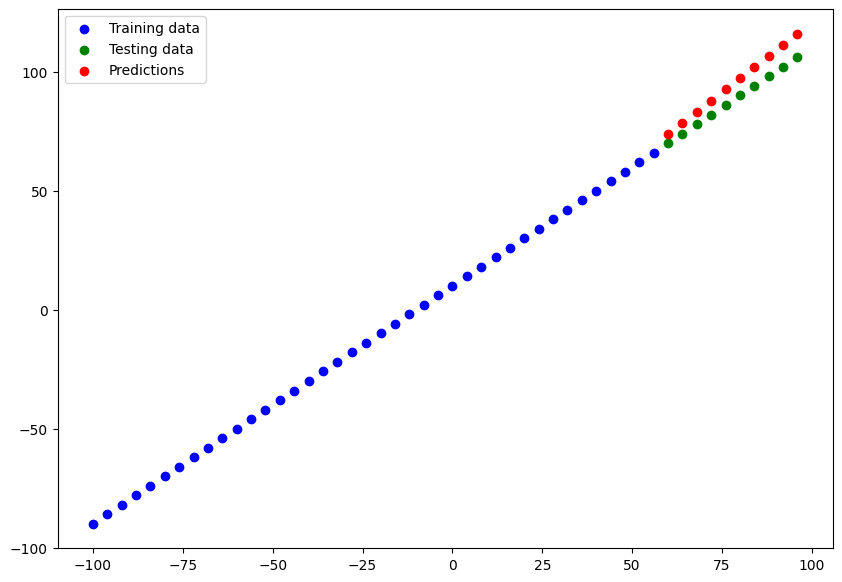

In [65]:
plot_predictions()

### Evaluation Metrics

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_test_np = y_test.numpy()

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test_np, y_pred)
mae = mean_absolute_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 51.343675860849906
Mean Absolute Error: 6.897376251220703
R-squared: 0.6110327586299249


In [67]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 6.8974 - mae: 6.8974


[6.897378444671631, 6.897378444671631]

In [68]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.897376>

In [69]:
# mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=51.343678>

In [70]:
# Make a function
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Run Experiments to improve model

In [71]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 14.2076 - mae: 14.2076
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 8.3682 - mae: 8.3682
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 10.5044 - mae: 10.5044
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 13.0029 - mae: 13.0029
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 12.0551 - mae: 12.0551
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3244 - mae: 9.3244
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 8.4810 - mae: 8.4810
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0313 - mae: 9.0313
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 18.5385 - mae: 18.5385
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 9.9917 - mae: 9.9917
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 17ms/step


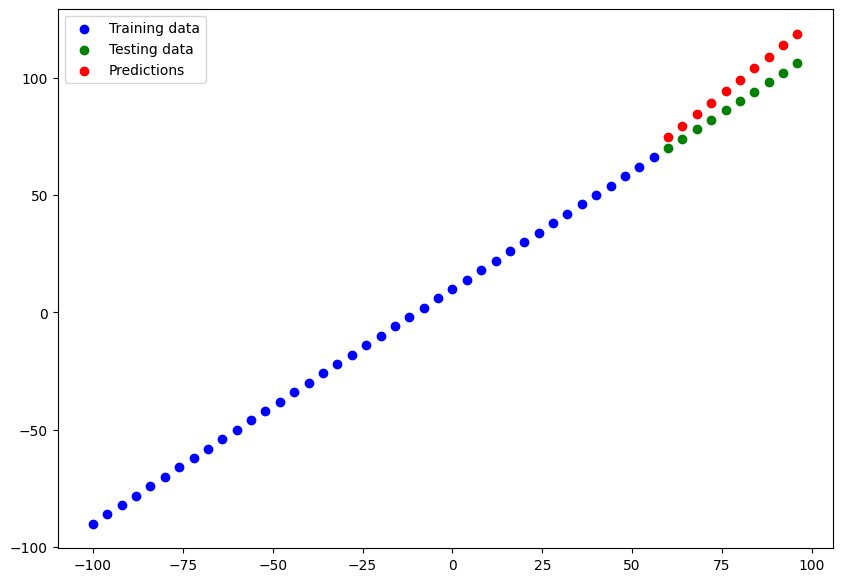

In [72]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [73]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(8.629547, 80.97771)

In [74]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 33.8817 - mae: 33.8817
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 28.1547 - mae: 28.1547
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 32.1940 - mae: 32.1940
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 13.5831 - mae: 13.5831
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 18.4541 - mae: 18.4541
Epoch 6/100
2/2 [==============================] - 0s 999us/step - loss: 9.3091 - mae: 9.3091
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.3237 - mae: 10.3237
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 11.2590 - mae: 11.2590
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 42.3519 - mae: 42.3519
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 29.5043 - mae: 29.5043
Epoch 11/100
2/2 [==============================] - 0s 1ms/

1/1 [==============================] - 0s 19ms/step


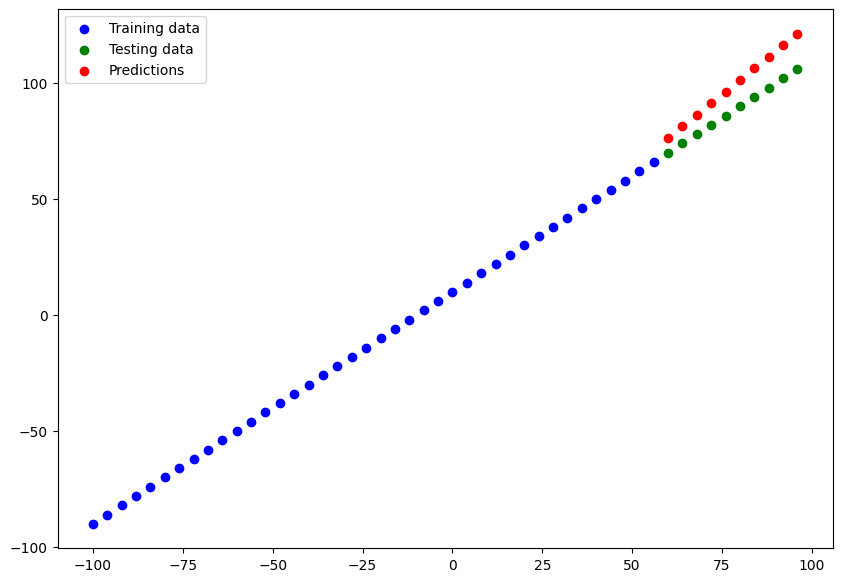

In [75]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [76]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(10.856744, 125.78694)

In [77]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 33.8817 - mae: 33.8817
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 28.1547 - mae: 28.1547
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 32.1940 - mae: 32.1940
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 13.5831 - mae: 13.5831
Epoch 5/500
2/2 [==============================] - 0s 973us/step - loss: 18.4541 - mae: 18.4541
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 9.3091 - mae: 9.3091
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 10.3237 - mae: 10.3237
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 11.2590 - mae: 11.2590
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 42.3519 - mae: 42.3519
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 29.5043 - mae: 29.5043
Epoch 11/500
2/2 [==============================] - 0s 1ms/

1/1 [==============================] - 0s 19ms/step


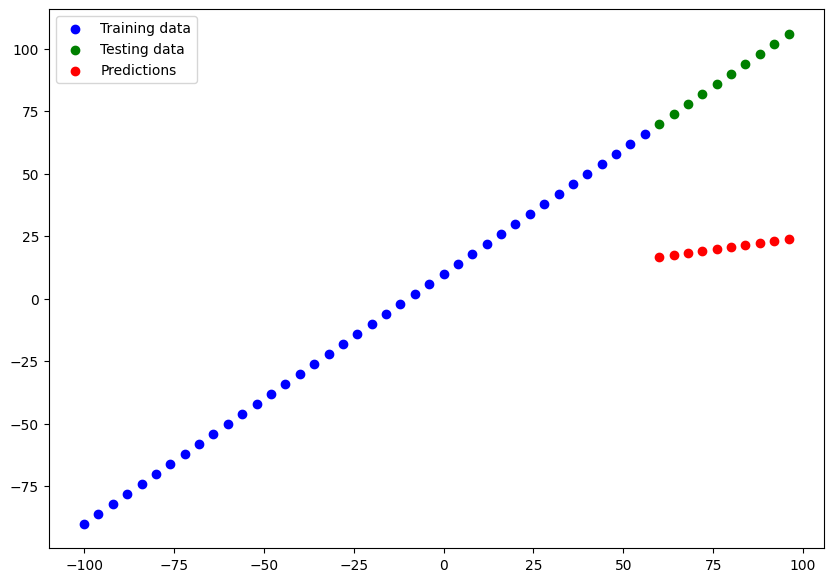

In [78]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [79]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()
mae_3, mse_3

(67.57417, 4650.265)

## Comapring Results of Experiments

In [80]:
import pandas as pd

In [81]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.629547,80.977707
1,model_2,10.856744,125.786942
2,model_3,67.574173,4650.265137


In [82]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Tensorboard
- Weights and Biases

## Save a model

1. SavedModel format
2. HDF5 Format

In [87]:
model_1.save('my_model')
model_1.save('my_model.keras')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


## Load Model

In [88]:
new_model = tf.keras.models.load_model('my_model.keras')
new_model_2 = tf.keras.models.load_model('my_model')

# Larger Example

In [107]:
insurance = pd.read_csv('/Users/merlesteffen/Documents/GitHub/Learning_Deep_Learning/Data/insurance.csv')

### Dtypes

In [108]:
# One Hot Encoding sex, smoker, region - get dummies
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Create X and y

In [109]:
y = insurance_one_hot.pop('charges')
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [111]:
X = insurance_one_hot.copy()

### Split Dataset

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build model network

In [129]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 791us/step - loss: 8666.0820 - mae: 8666.0820
Epoch 2/100
34/34 [==============================] - 0s 755us/step - loss: 6938.1416 - mae: 6938.1416
Epoch 3/100
34/34 [==============================] - 0s 667us/step - loss: 6535.0122 - mae: 6535.0122
Epoch 4/100
34/34 [==============================] - 0s 629us/step - loss: 6437.7812 - mae: 6437.7812
Epoch 5/100
34/34 [==============================] - 0s 636us/step - loss: 5434.8892 - mae: 5434.8892
Epoch 6/100
34/34 [==============================] - 0s 523us/step - loss: 4685.6445 - mae: 4685.6445
Epoch 7/100
34/34 [==============================] - 0s 541us/step - loss: 4122.2300 - mae: 4122.2300
Epoch 8/100
34/34 [==============================] - 0s 582us/step - loss: 4193.1387 - mae: 4193.1387
Epoch 9/100
34/34 [==============================] - 0s 578us/step - loss: 4105.6357 - mae: 4105.6357
Epoch 10/100
34/34 [==============================] - 0s 558us/step - loss: 3913.3

#### Evaluate Model

In [126]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 596us/step - loss: 3263.1809 - mae: 3263.1809


[3263.180908203125, 3263.180908203125]

#### Experiments

In [167]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='mae', metrics=['mae'])
history = insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 548us/step - loss: 13301.6494 - mae: 13301.6494
Epoch 2/200
34/34 [==============================] - 0s 485us/step - loss: 13133.9004 - mae: 13133.9004
Epoch 3/200
34/34 [==============================] - 0s 478us/step - loss: 12784.4688 - mae: 12784.4688
Epoch 4/200
34/34 [==============================] - 0s 426us/step - loss: 12098.9053 - mae: 12098.9053
Epoch 5/200
34/34 [==============================] - 0s 428us/step - loss: 10948.9707 - mae: 10948.9707
Epoch 6/200
34/34 [==============================] - 0s 435us/step - loss: 9485.0820 - mae: 9485.0820
Epoch 7/200
34/34 [==============================] - 0s 463us/step - loss: 8150.3540 - mae: 8150.3540
Epoch 8/200
34/34 [==============================] - 0s 458us/step - loss: 7520.8579 - mae: 7520.8579
Epoch 9/200
34/34 [==============================] - 0s 440us/step - loss: 7420.6841 - mae: 7420.6841
Epoch 10/200
34/34 [==============================] - 0s 460us/step - lo

In [168]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 514us/step - loss: 3487.9622 - mae: 3487.9622


[3487.962158203125, 3487.962158203125]

In [169]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_pred = insurance_model_2.predict(X_test)

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

9/9 [==============================] - 0s 399us/step
Mean Squared Error: 42406160.621629775
Mean Absolute Error: 3487.9621800545347
R-squared: 0.7268501957204279


Text(0.5, 0, 'epoch')

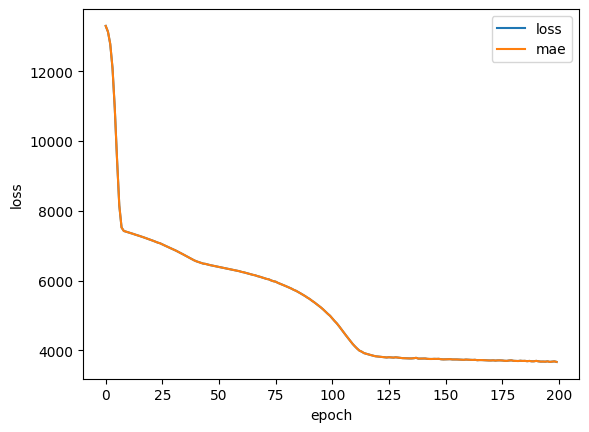

In [170]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

### Early Stopping

In [172]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='mae', metrics=['mae'])
history_2 = insurance_model_3.fit(X_train, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 535us/step - loss: 13301.6494 - mae: 13301.6494
Epoch 2/500
34/34 [==============================] - 0s 459us/step - loss: 13133.9004 - mae: 13133.9004
Epoch 3/500
34/34 [==============================] - 0s 458us/step - loss: 12784.4688 - mae: 12784.4688
Epoch 4/500
34/34 [==============================] - 0s 452us/step - loss: 12098.9053 - mae: 12098.9053
Epoch 5/500
34/34 [==============================] - 0s 461us/step - loss: 10948.9707 - mae: 10948.9707
Epoch 6/500
34/34 [==============================] - 0s 451us/step - loss: 9485.0820 - mae: 9485.0820
Epoch 7/500
34/34 [==============================] - 0s 456us/step - loss: 8150.3540 - mae: 8150.3540
Epoch 8/500
34/34 [==============================] - 0s 461us/step - loss: 7520.8579 - mae: 7520.8579
Epoch 9/500
34/34 [==============================] - 0s 449us/step - loss: 7420.6841 - mae: 7420.6841
Epoch 10/500
34/34 [==============================] - 0s 462us/step - lo

Text(0.5, 0, 'epoch')

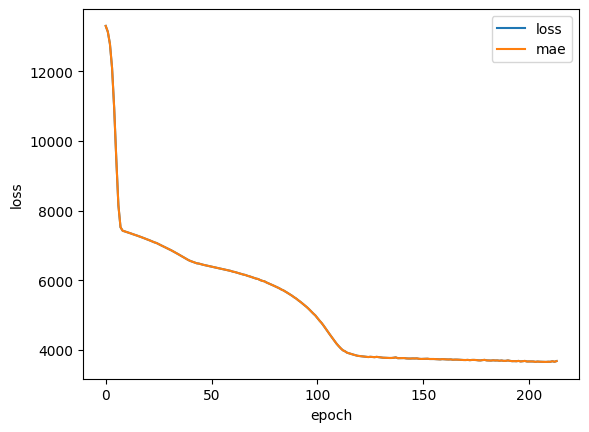

In [173]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

### Preprocessing data (normalization and standardization)

Neural Networks tend to prefer normalisation.

In [180]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create a X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data and then only transform test data
ct.fit(X_train)

# Transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [181]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='mae', metrics=['mae'])
history_2 = insurance_model_3.fit(X_train_normal, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 558us/step - loss: 13344.3457 - mae: 13344.3457
Epoch 2/500
34/34 [==============================] - 0s 463us/step - loss: 13335.9443 - mae: 13335.9443
Epoch 3/500
34/34 [==============================] - 0s 466us/step - loss: 13314.4971 - mae: 13314.4971
Epoch 4/500
34/34 [==============================] - 0s 478us/step - loss: 13269.6084 - mae: 13269.6084
Epoch 5/500
34/34 [==============================] - 0s 443us/step - loss: 13190.2627 - mae: 13190.2627
Epoch 6/500
34/34 [==============================] - 0s 450us/step - loss: 13064.9297 - mae: 13064.9297
Epoch 7/500
34/34 [==============================] - 0s 476us/step - loss: 12883.0146 - mae: 12883.0146
Epoch 8/500
34/34 [==============================] - 0s 456us/step - loss: 12634.4434 - mae: 12634.4434
Epoch 9/500
34/34 [==============================] - 0s 467us/step - loss: 12309.0996 - mae: 12309.0996
Epoch 10/500
34/34 [==============================] - 0s 467us/s

Text(0.5, 0, 'epoch')

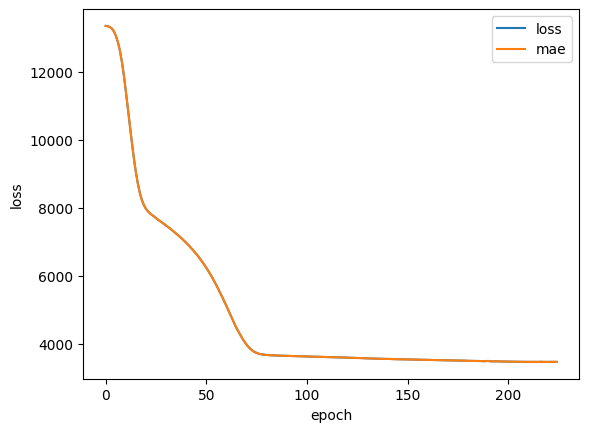

In [182]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

In [183]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_pred = insurance_model_3.predict(X_test_normal)

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

9/9 [==============================] - 0s 387us/step
Mean Squared Error: 43241309.414377294
Mean Absolute Error: 3161.312409330639
R-squared: 0.7214707714589692
